In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [3]:
csv_path = "carpetas-de-investigacion-pgj-de-la-ciudad-de-mexico.csv"
carpetas = pd.read_csv(csv_path,encoding="latin-1")
carpetas.head()

,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
0,2016.0,Mayo,2016-05-19 11:15:00,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN AGENCIAS DE ATENCIÃN ESPECI...,STCMZV,UI-1CD,CUAUHTEMOC,DOCTORES,2016,Mayo,2016-05-19 13:09:32,INTERIOR VAGON DEL METRO ESTACION NIÃOS HÃRO...,NIÃOS HEROES,-99.150633,19.419482,"19.4194819998,-99.150633"
1,2015.0,Diciembre,2015-12-04 10:00:00,DENUNCIA DE HECHOS,HECHO NO DELICTIVO,INVESTIGACIÃN PARA LA ATENCIÃN DE DELITOS SE...,FDS-6,FDS-6-01,GUSTAVO A MADERO,CHALMA DE GUADALUPE,2016,Mayo,2016-05-19 13:09:56,QUERETARO NO.86 MZ 520 LT 13,NaN,-99.153112,19.549869,"19.5498689998,-99.153112"
2,2016.0,Mayo,2016-05-19 01:30:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN IZTAPALAPA,IZP-2,UI-1CD,IZTAPALAPA,LOS REYES CULHUACÃN,2016,Mayo,2016-05-19 13:21:33,CUAUHTEMOC MZ.15 LT.8,SILOS,-99.110467,19.347049,"19.3470489998,-99.110467"
3,2016.0,Mayo,2016-05-19 12:30:00,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN GUSTAVO A. MADERO,GAM-2,UI-1CD,GUSTAVO A MADERO,GERTRUDIS SANCHEZ 3A SECCION,2016,Mayo,2016-05-19 13:24:45,CALLE NORTE 84,ESQUINA ORIENTE 107,-99.101675,19.462630,"19.4626299998,-99.101675"
4,2016.0,Mayo,2016-05-06 18:40:00,DESPOJO,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN TLAHUAC,TLH-2,UI-1SD,IZTAPALAPA,AREA FEDERAL PANTEON SAN LORENZO TEZONCO,2016,Mayo,2016-05-19 13:25:05,PROVIDENCIA,TESORO,-99.056319,19.308832,"19.3088319998,-99.056319"


In [156]:
# Separar 2018
carpetas2018=carpetas.loc[carpetas["ao_hechos"] ==2018, :]
#carpetas2018=carpetas2018.loc[carpetas2018["mes_hechos"] =="", :]



In [157]:
# Creamos la columna conducta
carpetas2018["conducta"]=carpetas2018["delito"]


C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [158]:
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ABUSO DE CONFIANZA", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("FRAUDE", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LA ADMINISTRACION DE JUSTICIA", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("VIOLENCIA FAMILIAR", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A NEGOCIO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE OBJETOS", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("AMENAZAS", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DENUNCIA DE HECHOS", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE ACCESORIOS DE AUTO", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ABUSO DE CONFIANZA", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICO", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A CASA HABITACION SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A NEGOCIO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("NARCOMENUDEO POSESION SIMPLE", "NARCO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DESPOJO", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA INTENCIONAL", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LESIONES INTENCIONALES POR GOLPES", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LESIONES CULPOSAS POR TRANSITO VEHICULAR EN COLISION", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ABUSO SEXUAL", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("USURPACIÃN DE IDENTIDAD", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE DINERO", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE EN VIA PUBLICA SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LESIONES INTENCIONALES POR ARMA DE FUEGO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA CULPOSA", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE DOCUMENTOS", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE VEHICULO DE PEDALES", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ABUSO DE AUTORIDAD", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("TENTATIVA DE EXTORSION", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A REPARTIDOR CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("FALSIFICACION DE DOCUMENTOS", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE METROBUS SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("SUSTRACCION DE MENORES", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DELITOS AMBIENTALES", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ENCUBRIMIENTO", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE MOTOCICLETA CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR OTRAS CAUSAS", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("VIOLACION", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LESIONES INTENCIONALES", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LESIONES INTENCIONALES POR ARMA BLANCA", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("QUEBRANTAMIENTO DE SELLOS", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO POR ARMA DE FUEGO", "HOMICIDIO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE MOTOCICLETA SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ALLANAMIENTO DE MORADA", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LESIONES CULPOSAS POR TRANSITO VEHICULAR", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LESIONES CULPOSAS", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("NEGACION DEL SERVICIO PUBLICO", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ABANDONO DE PERSONA", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ACOSO SEXUAL", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA CULPOSA POR TRÃNSITO A AUTOMOVIL", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE TRANSPORTE PÃBLICO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE TRANSPORTE PÃBLICO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("NARCOMENUDEO POSESIÃN CON FINES DE VENTA, COMERCIO Y SUMINISTRO", "NARCO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE VEHICULO DE SERVICIO PÃBLICO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE PESERO COLECTIVO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE VEHICULO DE SERVICIO PÃBLICO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DISCRIMINACION", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE OBJETOS A ESCUELA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PRIVACION DE LA LIBERTAD PERSONAL", "SECUESTRO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE SALIENDO DEL BANCO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("INSOLVENCIA ALIMENTARIA", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("TORTURA", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("EXTORSION", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE PLACA DE AUTOMOVIL", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A REPARTIDOR SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE EN NEGOCIO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("USO INDEBIDO DE ATRIBUCIONES Y FACULTADES", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("FALSEDAD DE DECLARACIONES", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A CASA HABITACION CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("RESISTENCIA DE PARTICULARES (SE OPONGA O RESISTA)", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("TENTATIVA DE ROBO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PORTACION ARMA/PROHIB.", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LESIONES CULPOSAS POR CAIDA", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO / CONDUCTOR DE TAXI CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR SUICIDIO", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DELITOS ELECTORALES", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("USO DE DOCUMENTO FALSO", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("EJERCICIO INDEBIDO DEL SERVIDOR PUBLICO", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("COHECHO", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("CONTRA FUNCIONARIOS PUBLICOS", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE METRO CON VIOLENCIA", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("RESPONSABILIDAD PROFESIONAL", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIOS INTENCIONALES (OTROS)", "HOMICIDIO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO CULPOSO POR TRÃNSITO VEHICULAR (ATROPELLADO)", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO POR ARMA BLANCA", "HOMICIDIO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A OFICINA PÃBLICA SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE EN RESTAURANT CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PORTACION DE ARMA DE FUEGO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A CASA HABITACION Y VEHICULO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("TRATA DE PERSONAS", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE ANIMALES", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE ARMA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR CAIDA", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DAÃ‘O EN PROPIEDAD AJENA CULPOSA POR TRÃNSITO VEHICULAR A BIENES INMUEBLES", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA CULPOSA POR TRÃNSITO VEHICULAR A AUTOMOVIL", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA INTENCIONAL A BIENES INMUEBLES", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA INTENCIONAL A CASA HABITACION", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PORNOGRAFIA INFANTIL", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DESOBEDENCIA DE PARTICULARES", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DISPAROS DE ARMA DE FUEGO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PRIV. ILEGAL DE LA LIB. Y ROBO DE VEHICULO", "SECUESTRO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("VIOLACION EQUIPARADA", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO POR GOLPES", "HOMICIDIO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE TAXI SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ABORTO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("CORRUPCION DE MENORES", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("POSESION DE VEHICULO ROBADO", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DELITOS DE ABOGADOS PATRONOS Y LITIGANTES", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LESIONES CULPOSAS POR QUEMADURAS", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR ENFERMEDAD", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR PARO CARDIACO", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("TENTATIVA DE HOMICIDIO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE PESERO COLECTIVO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("TENTATIVA DE ROBO DE VEHICULO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ATAQUE A LAS VIAS DE COMUNICACION (DAÃO A VIAS O MEDIOS DE TRANSPORTE)", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR PRECIPITACION", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LESIONES CULPOSAS POR CAIDA DE VEHÃCULO EN MOVIMIENTO", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A REPARTIDOR Y VEHICULO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE FLUIDOS", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE METROBUS CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("FEMINICIDIO", "HOMICIDIO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("USURPACION DE FUNCIONES", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("TENTATIVA DE FRAUDE", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSPORTISTA Y VEHICULO PESADO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO CULPOSO", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE ALHAJAS", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("REVELACION DE SECRETOS", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("INTIMIDACION", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ESTUPRO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE EN PARQUES Y MERCADOS CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE VEHICULO DE SERVICIO DE TRANSPORTE SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("VIOLACION TUMULTUARIA", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR SUICIDIO EN EL METRO", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A NEGOCIO Y VEHICULO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("EXPLOTACIÃN DE MENOR O DISCAPACITADO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PLAGIO O SECUESTRO", "SECUESTRO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("USURPACION DE PROFESION", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A REPARTIDOR Y VEHICULO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A NEGOCIO Y VEHICULO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("COBRANZA ILEGITIMA", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE VEHICULO DE SERVICIO DE TRANSPORTE CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO EN ECOBUS CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO EN RTP CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO EN AUTOBÃS FORÃNEO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE SALIENDO DEL CAJERO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("TENTATIVA DE VIOLACION", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR QUEMADURA", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR AHOGAMIENTO", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO CULPOSO FUERA DEL D.F (ATROPELLADO)", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DDH OTRAS MATERIAS", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO CULPOSO POR ARMA DE FUEGO", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA INTENCIONAL A NEGOCIO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO EN RTP SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("TRAFICO DE INFANTES", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR DERRUMBE", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("VIOLACION DE CORRESPONDENCIA", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DESAPARICION FORZADA DE PERSONAS", "HOMICIDIO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("VIOLACION EQUIPARADA POR CONOCIDO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR ACCIDENTE LABORAL", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DURANTE TRASLADO DE VALORES (NOMINA) CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LESIONES CULPOSAS ACCIDENTE LABORAL", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A SUCURSAL BANCARIA (SUPERMERCADO) CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO EN TREN LIGERO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO POR AHORCAMIENTO", "HOMICIDIO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO EN TROLEBUS SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PECULADO", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO CULPOSO POR TRÃNSITO VEHICULAR (CAIDA)", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR INTOXICACION", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ATAQUES A LA PAZ PUBLICA", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE MAQUINARIA CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR CONGESTION ALCOHOLICA", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("TRAFICO DE INFLUENCIA", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERSONAS EXTRAVIADAS", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("FALSIFICACION DE SELLOS, MARCAS, LLAVES Y OTROS", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DDH ANONIMAS", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO EN TREN SUBURBANO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO EN TREN LIGERO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DDH RELACIONADAS", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("OPOSICION A LA OBRA PUBLICA", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("REGULACIÃN URBANA", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A CASA HABITACION Y VEHICULO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSPORTISTA Y VEHICULO PESADO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE PESERO Y VEHICULO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A SUCURSAL BANCARIA (ASALTO BANCARIO) CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("TENTATIVA DE SUICIDIO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO CULPOSO POR TRÃNSITO VEHICULAR", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE VEHICULO DE SERVICIO OFICIAL SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("EVASION DE PRESOS", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DDH INCOMPETENCIA", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE INFANTE", "SECUESTRO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE EN VIA PUBLICA (NOMINA) CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO EN INTERIOR DE EMPRESA (NOMINA) SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE VEHICULO DE SERVICIO OFICIAL CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("OPERACIONES CON RECURSOS DE PROCEDENCIA ILICITA", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE EN TERMINAL DE PASAJEROS CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DE MAQUINARIA SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A OFICINA PÃBLICA CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DDH SIN DATOS", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("INHUMACIONES Y/O EXHUMACIONES", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO CULPOSO POR INSTRUMENTO PUNZO CORTANTE", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("MALTRATO ANIMAL", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("VARIACION DE NOMBRE O DOMICILIO", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("BIGAMIA", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO CULPOSO FUERA DEL D.F (COLISION)", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE EN CINE CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("CONTRA EL ESTADO CIVIL", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DDH OFICIO COLABORACION", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE EN HOTEL CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO EN TROLEBUS CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A SUCURSAL BANCARIA (SUPERMERCADO) SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("SABOTAJE", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PELIGRO DE CONTAGIO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR ASFIXIA", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ENTREGA ILEGITIMA DE UN MENOR", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ENRIQUECIMIENTO ILICITO", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("CALUMNIAS", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("LENOCINIO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("VIOLACION DE LA INTIMIDAD", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("EXPOSICION DE MENORES", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DIFAMACION", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("CONCUSION", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DDH CERESO", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DDH FRVT", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("CAMBIO DE USO DE SUELO", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO DURANTE TRASLADO DE VALORES (NOMINA) SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A TRANSEUNTE Y VEHICULO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR ENVENENAMIENTO", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DDH FDS", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO A PASAJERO EN TREN SUBURBANO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DENUNCIA DE HECHOS POR ROBO DE CELULAR", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ROBO EN INTERIOR DE EMPRESA (NOMINA) CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DENUNCIA DE HECHOS POR ROBO DE CELULAR", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DENUNCIA DE HECHOS POR ROBO DE CELULAR", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DENUNCIA DE HECHOS POR ROBO DE CELULAR", "ROBO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PERDIDA DE LA VIDA ASFIXIA POR ALIMENTOS/ LIQUIDOS", "MUERTES")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("USO INDEBIDO DE CONDECORACIONES UNIFORMES E INSIGNIAS", "ENGAÑO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("PRIVACION DE LA LIBERTAD PERSONAL (REALIZAR ACTO SEXUAL)", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("SECUESTRO EXPRESS (PARA COMETER ROBO O EXTORSIÃ“N)", "SECUESTRO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("HOMICIDIO CULPOSO POR TRÃNSITO VEHICULAR (COLISION)", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA CULPOSA POR TRÃNSITO VEHICULAR A BIENES INMUEBLES", "ACCIDENTE")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("SECUESTRO EXPRESS (PARA COMETER ROBO O EXTORSIÃN)", "SECUESTRO")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("ATAQUE A LAS VIAS GENERALES DE COMUNICACIÃN", "ADMON")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA INTENCIONAL A VIAS DE COMUNICACION", "VIOLENCIA")
carpetas2018["conducta"]= carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA CULPOSA POR TRÃNSITO VEHICULAR A VIAS DE COMUNICACION", "ACCIDENTE")

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

In [203]:
delito=carpetas2018["conducta"].value_counts()
delito1= pd.DataFrame(delito).reset_index()
delito1.head(30)

,index,conducta
0,ROBO,81666
1,VIOLENCIA,53884
2,ASALTO,43447
3,ENGAÑO,36119
4,ADMON,14842
5,ACCIDENTE,11113
6,NARCO,5974
7,MUERTES,2337
8,HOMICIDIO,1550
9,SECUESTRO,894


In [212]:
# PARA IMPIRIMIR UNA COLUMNA ESPECIFICA
#print(delito1.iloc[11,0])

delito1=delito1.rename(columns={"index":"Conducta","conducta":"Denuncias"})

In [186]:
carpetas2018.to_csv("Carpetas2018.csv")

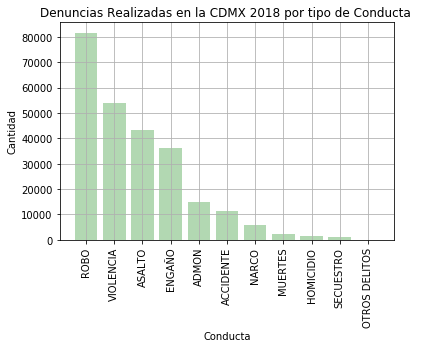

In [227]:
x_axis = np.arange(len(delito1))
denun=pd.DataFrame(delito1["Denuncias"].map("{:,}".format))


plt.bar(x_axis,delito1["Denuncias"] , color='green', alpha=.3, align="center")
plt.title("Denuncias Realizadas en la CDMX 2018 por tipo de Conducta ")
plt.xlabel("Conducta")
plt.ylabel("Cantidad")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, delito1["Conducta"],rotation=90)   
plt.grid()

In [225]:

denun=pd.DataFrame(delito1["Denuncias"].map("{:,}".format))

denun

,Denuncias
0,"81,666"
1,"53,884"
2,"43,447"
3,"36,119"
4,"14,842"
5,"11,113"
6,"5,974"
7,"2,337"
8,"1,550"
9,894
